In [45]:
%matplotlib inline 
import numpy as np #work with arrays
from scipy import integrate
#from scipy.integrate import odeint
from matplotlib.pylab import *

# Rayleigh Plesset Equation

The Rayleigh Plesset Equation (without viscous dissipation) is given by Eq. (1):
\begin{equation}
R \ddot{R} +\frac{3}{2} \dot{R}^2=\frac{p_v-p_\infty(t)}{\rho}+\frac{p_{g0}}{\rho}\left(\frac{R_0}{R}\right)^{3\kappa}-\frac{2\sigma}{\rho R}\tag{1}
\end{equation}
The driving of the bubble occurs through the pressure $p_\infty(t)$ term. This could be for example through a harmonic driving $p_\infty(t)=p_0 + p_a \sin (\omega t)$ where $\omega$ is the angular frequency, $p_0$ the static pressure, and $p_a$ the amplitude of the driving.

We want to solve this equation for small and large oscillations, i.e. for small and large pressures $p_a$. To do so we first define the constants for an air bubble in water at room temperature undergoing isothermal compression.

In [177]:
pv=2.3388e3     #[Pa] vapour pressure of water
sigma=0.072     #[N/m] coefficient of surface tension between air and water
rho=998.        #[kg/m^3] density of water
kappa=1.       #polytropic exponent of the gas
p0=1e5          #[Pa] static pressure
nu=1e-6         #[m^2/s]

The gas pressure at equilibrium is given by the equilibrium condition

\begin{equation}
p_v+p_{g0}=p_\infty+\frac{2\sigma}{R}\tag{2}
\end{equation}

We can solve this nonlinear ODE with the built in solver in python. Therefore, we have to rephrase the 2nd Order ODE into two first order ODEs by variable substitution:

\begin{eqnarray}
y_0&=&R\tag{3a}\\
y_1&=&\tag{3b}\dot{R}
\end{eqnarray}

\begin{equation}
\dot{R}=\frac{dy_0}{dt}=y_1 \tag{4}
\end{equation}
and using the Rayleigh Equation we obtain:
\begin{equation}
\ddot{R}=\frac{dy_1}{dt}=\frac{1}{y_0}\left[
\frac{p_v-p_\infty(t)}{\rho}+\frac{p_g0}{\rho}\left(\frac{R_0}{y_0}\right)^{3\kappa}-\frac{2\sigma}{\rho y_0}-\frac{3}{2}(y_1)^2
\right]\tag{5}
\end{equation}

We use a slightly modified version of the equation by introducing additionally some dissipation from viscosity of the liquid. This term is added on thr R.H.S of Eq. (5) which is $-4\mu\dot{R}{R}^{-1}$.

These two first order ODEs are defined in the function `rp(t,y)`

In [178]:
def rp(t,y):
    pinfty=p0-pa*np.sin(f*2.*np.pi*t)*(1./f*ncycles>t)
    pg0=p0+2.*sigma/R0-pv
    dydt0=y[1]
    dydt1=(pv-pinfty+pg0*(R0/y[0])**(3.*kappa)\
           -2.*sigma/y[0])/rho/y[0]-1.5*y[1]**2./y[0]\
           -4.*nu*y[1]/y[0]/y[0]
    return [dydt0,dydt1]

0.0
0.0
True
True


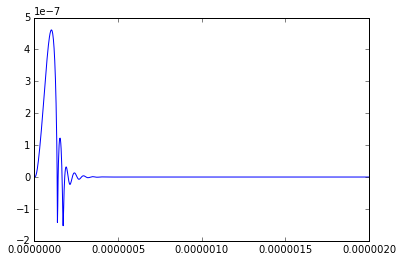

In [185]:
pa=.4e6
R0=3e-7
f=5e6
ncycles=1.

t_initial=0./f
t_final=10./f
delta_t = t_final/1000.
num_steps = int(t_final/delta_t) + 3
time = np.zeros((num_steps, 1))
R = np.zeros((num_steps, 1))

ode15s = integrate.ode(rp)
ode15s.set_integrator('vode', method='bdf')
ode15s.set_initial_value([R0,0.], 0.)
while ode15s.successful() and ode15s.t < t_initial-delta_t:
    ode15s.integrate(ode15s.t+delta_t)
ode15s.integrate(t_initial)

print t_initial
print ode15s.t
print ode15s.successful()

ode15s.set_initial_value([ode15s.y[0],ode15s.y[1]], t_initial)
time[0] = ode15s.t
R[0] = ode15s.y[0]

k = 1
while ode15s.successful() and ode15s.t < (t_initial+t_final):
    ode15s.integrate(ode15s.t+delta_t)
    time[k] = ode15s.t
    R[k] = ode15s.y[0]
    k += 1
    
plt.plot(time[0:k-1],R[0:k-1]-R0);
print ode15s.successful()

In [126]:
k=1.5
int(k)

1